In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from sklearn import datasets
from scipy.stats import chisquare, chi2_contingency, ttest_ind
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"Seaborn Version: {sns.__version__}")

Seaborn Version: 0.13.2


## Exploratory Data Analysis

In [37]:
df = pd.read_csv("toy_data/test.csv")

In [38]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
df["Age"].fillna(value=df["Age"].median, inplace=True)
df["Fare"].fillna(value=df["Fare"].median, inplace=True)

In [46]:
# df.head()

## Univariate Analysis

#### Numerical

| **Normality Test**| |
|---------|-----------|
|Q-Q Plot | Hist + KDE|
|Confidence Interval| Box plot |

**Normality Check**

In [ ]:
from scipy import stats
# tes of normality
def check_normality(data):
    """ 
    hypothesis test for normality check in continuous variable
    """
    stat, p_value = stats.shapiro(data)
    h_0 = "H0: data normally distributed"
    h_1 = "H1: data not normally distributed"
    result = ""
    if p_value < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"

    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

**QQ-Plot**

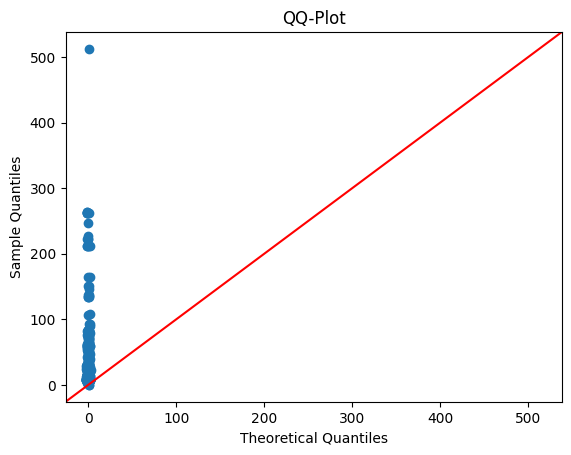

In [15]:
sm.qqplot(df[["Fare"]], line='45')
plt.title("QQ-Plot")
plt.show()

**Hist + KDE**

<Axes: xlabel='Age', ylabel='Count'>

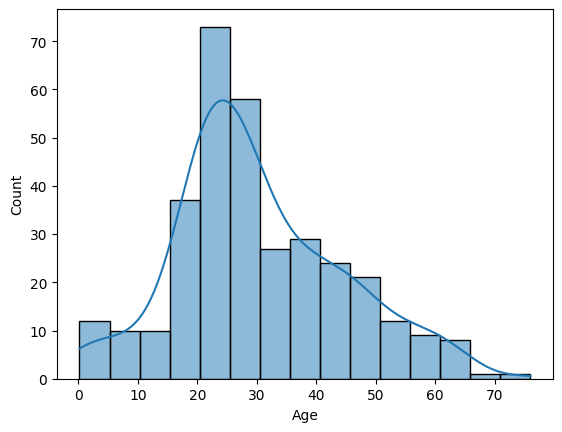

In [18]:
sns.histplot(data=df, x="Age", kde=True)

**Confidence Interval**

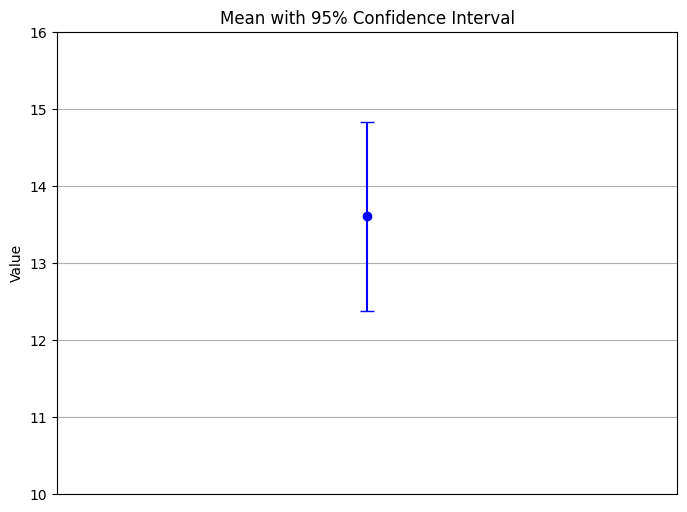

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example data
data = np.array([12, 15, 14, 10, 13, 16, 14, 15, 14, 13])
# data = df["Age"].values

# Calculate mean and confidence interval
mean = np.mean(data)
std_err = stats.sem(data)
confidence = 0.95
ci = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)

# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(1, mean, yerr=[[mean - ci[0]], [ci[1] - mean]], fmt='o', color='blue', capsize=5)
plt.xlim(0, 2)
plt.ylim(min(ci[0] - 1, min(data)), max(ci[1] + 1, max(data)))
plt.xticks([])
plt.ylabel('Value')
plt.title('Mean with 95% Confidence Interval')
plt.grid(True)
plt.show()


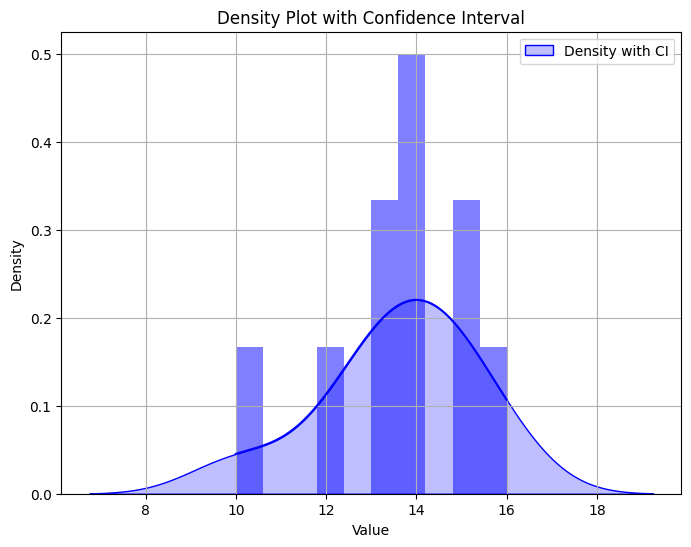

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = np.array([12, 15, 14, 10, 13, 16, 14, 15, 14, 13])

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame(data, columns=['Value'])

# Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['Value'], kde=True, stat='density', linewidth=0, color='blue', bins=10)
sns.kdeplot(df['Value'], color='blue', label='Density with CI', fill=True)
plt.title('Density Plot with Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
def confidence_interval()

**Box Plot**

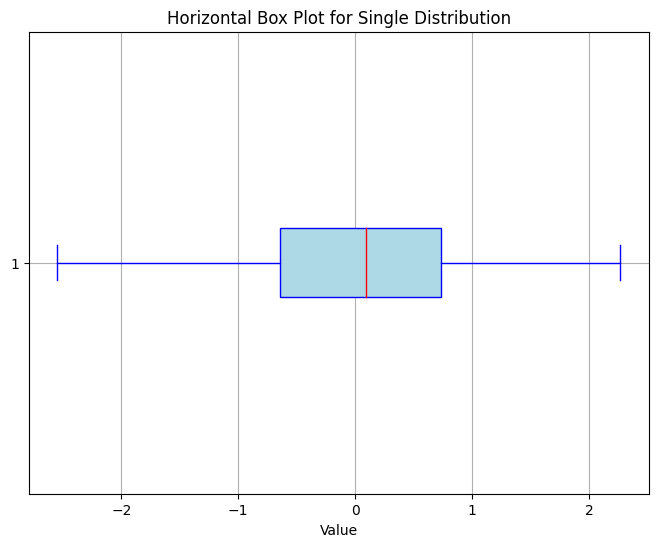

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)

# Plot horizontal box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'))

plt.xlabel('Value')
plt.title('Horizontal Box Plot for Single Distribution')
plt.grid(True)
plt.show()


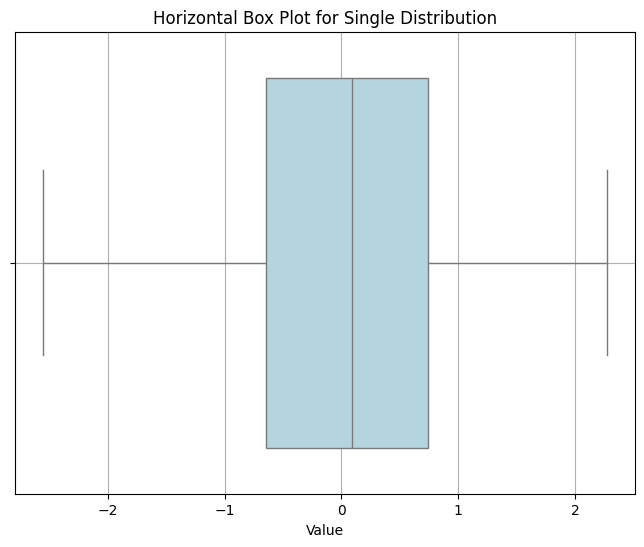

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data
np.random.seed(0)
data = pd.DataFrame({
    'Value': np.random.normal(loc=0, scale=1, size=100)
})

# Plot horizontal box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Value', data=data, color='lightblue')

plt.xlabel('Value')
plt.title('Horizontal Box Plot for Single Distribution')
plt.grid(True)
plt.show()


## Final Fucntions

In [ ]:
def plot_numerical_summary(df: pd.DataFrame, col: str, max_: float):
    """ 
    Performs normality check on continuous variable,
    and visually show's test statistics.

    Parameters:
    df (pd.DataFrame): pandas dataframe

    col (str): column name present in dataframe

    max_ (float): y-axis(height) to visually plot measure of central tendency 

    Returns:
    None
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    df_dict=check_normality(df[col])
    df_hypo_title = "{}\n{}\np-value:{} alpha: 0.05\n Result: {}".format(df_dict["h0"],
                                                                            df_dict["h1"],
                                                                            df_dict["p_val"],
                                                                            df_dict["cc"])

    fig.suptitle(df_hypo_title)

    sm.qqplot(df[col], line='45', ax=axs[0])
    axs[0].set_title("Q-Q Plot")
    df[col].plot(kind="kde", ax=axs[1])
    axs[1].vlines(ymin=0,ymax=max_,x=df[col].mean(), color="red",label="Mean")
    axs[1].vlines(ymin=0,ymax=max_,x=df[col].median(), color="green",label="Median")
    axs[1].set_xlabel(col)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

#### Categorical

| **Chi-Square Test Distribution**| all plot should match color |
|---------|-----------|
|observed vs expected with threshold | Pie chart|